In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from scipy import integrate


In [2]:
!python --version

Python 3.6.9


In [3]:
# all_data = pd.read_excel("/content/Данные (1).xlsx", skiprows=3)

In [4]:
#sheetname - здесь сможем менять названание файла

all_data = pd.read_excel("/content/Данные (1) (1).xlsx", sheet_name="1_5", skiprows=3)


In [5]:
all_data.head()

,Наименование организации,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,2015-10-01 00:00:00,2015-11-01 00:00:00,2015-12-01 00:00:00,2016-01-01 00:00:00,2016-02-01 00:00:00,2016-03-01 00:00:00,2016-04-01 00:00:00,2016-05-01 00:00:00,2016-06-01 00:00:00,2016-07-01 00:00:00,2016-08-01 00:00:00,2016-09-01 00:00:00,2016-10-01 00:00:00,2016-11-01 00:00:00,2016-12-01 00:00:00,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00
0,Х1,44.8682,54.4026,50.4015,48.2335,46.0757,47.0092,46.2998,50.9418,54.3674,50.2867,50.188,55.2518,55.7245,57.9464,57.9467,55.1225,53.3451,45.3466,56.1916,63.6844,58.4712,62.2365,60.0777,58.5915,58.0866,38.1746,32.7084,45.2007,37.7252,38.44,38.9301,37.602,32.2226,32.2092,30.449,31.6403,32.3986,30.4564,30.5714,30.2397,32.6807,32.9434,31.8519,31.903,33.9754,31.6643,31.6111,31.683,31.4786,30.4238,30.3935,28.5082,27.3527,26.9208,24.6612,24.2006,24.5693,21.9153,21.3979,21.1134,19.0234,18.8175,18.993,19.5441,18.012,15.5883,0,0
1,Х2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Х3,48.3473,52.9609,49.8953,47.6278,44.3243,43.4688,44.4502,46.1194,47.356,47.2626,46.5984,45.705,47.9114,49.0813,46.7713,44.1429,43.0461,41.6716,40.8242,41.7121,39.4465,38.6365,38.0971,36.6638,35.1191,34.6277,32.0866,31.2741,31.2523,29.1811,29.9441,30.2739,27.6767,27.5638,27.0875,24.9667,24.642,24.2077,21.6849,22.1175,23.21,21.3245,41.9466,41.5696,42.9072,42.0744,41.5095,41.4639,42.6252,41.1464,42.3676,40.455,40.3811,40.0941,39.2487,39.1268,40.0448,39.1326,38.6667,37.9506,37.222,37.5384,36.9074,41.0241,39.3269,36.7743,36.2937,37.2441
3,Х4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Х5,44.0564,50.0786,46.5784,45.9423,41.068,43.6206,43.5961,46.3355,46.5063,47.0354,46.6499,47.6609,51.5761,48.5373,48.2849,45.7983,44.4353,45.6495,45.0258,45.7986,45.1373,44.3081,44.0504,44.8469,41.8544,41.5025,40.5926,39.9574,39.8406,39.7737,40.85,41.0833,40.7336,40.6461,39.7136,39.9179,39.8376,39.1243,38.6487,39.3914,40.9898,41.2424,41.6872,40.3786,42.4289,40.6902,40.819,35.1985,35.6119,34.3683,21.161,20.2989,20.1442,20.4812,18.8286,18.6846,19.6639,17.9168,17.3062,17.4424,15.8513,15.8378,16.7767,0,0,0,0,16.8593


In [6]:
good_company = all_data.iloc[0:358]

In [7]:
good_company.set_index('Наименование организации', inplace=True)

In [8]:
#remove zeros

In [9]:
good_company = good_company[(good_company.T != 0).any()]

In [10]:
default_company=all_data.iloc[363:]

In [11]:
default_company.set_index('Наименование организации', inplace=True)

In [12]:
default_company = default_company[(default_company.T != 0).any()]

In [13]:
default_company_pv=pd.pivot_table(default_company, index=["Наименование организации"], aggfunc=np.sum)

In [14]:
good_company_pv=pd.pivot_table(good_company, index=["Наименование организации"], aggfunc=np.sum)

In [15]:
#удаление 

In [16]:
#prepare data for machine learning

In [17]:
default_company_pv['label']=1

In [18]:
good_company_pv['label']=0

In [19]:
frames = [default_company_pv, good_company_pv]
df = pd.concat(frames)

In [20]:
df_sh = df.sample(n=len(df), random_state=42)

In [21]:
df_sh = df_sh[(df_sh.T != 0).any()]

In [22]:
df_sh

,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,2015-10-01 00:00:00,2015-11-01 00:00:00,2015-12-01 00:00:00,2016-01-01 00:00:00,2016-02-01 00:00:00,2016-03-01 00:00:00,2016-04-01 00:00:00,2016-05-01 00:00:00,2016-06-01 00:00:00,2016-07-01 00:00:00,2016-08-01 00:00:00,2016-09-01 00:00:00,2016-10-01 00:00:00,2016-11-01 00:00:00,2016-12-01 00:00:00,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,label
Наименование организации,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Д17.19,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,91.45070,91.58900,86.76340,86.81500,87.47430,86.15960,85.51360,85.02640,84.50470,85.13350,83.94630,84.13550,83.86460,83.84550,83.7497,82.4108,82.26430,84.69530,84.6484,83.83330,78.7655,84.28460,84.1845,84.1692,83.9674,83.382,84.39240,83.51250,87.32250,84.58950,82.4134,83.5329,85.4154,85.3988,85.2958,85.2671,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1
Х78,36.2121,42.1001,40.5414,39.7833,38.1221,37.4838,38.2488,42.2459,44.7818,44.5547,43.5542,44.2456,44.5408,46.38865,46.62190,45.41880,45.77800,46.69400,47.45245,45.71230,46.31740,44.79445,44.40445,45.35880,44.57570,44.86320,44.04280,44.47170,44.20410,45.64045,45.40620,45.19265,44.76415,46.4157,46.0243,46.10780,43.32680,43.0841,46.35455,46.2071,46.00015,46.8968,47.1069,47.1838,47.7408,50.47480,42.52205,42.44155,44.34415,43.1543,44.2588,46.3451,46.6745,47.6117,48.5376,49.1057,49.7531,46.4469,47.7433,49.6710,50.4336,52.2166,48.0703,51.5585,53.2382,55.6171,56.0589,56.4991,0
Д41.18,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,18.87380,18.62770,17.95100,18.33120,17.57930,15.19930,16.26810,16.97280,17.25400,17.38340,17.36430,17.90650,18.02640,17.62260,17.8993,18.1944,18.24220,16.35150,16.341,16.47010,16.3284,15.71190,16.5802,16.1063,18.5272,18.1769,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1
Х234,59.6276,64.9156,60.8937,59.6871,59.9549,58.6547,58.6761,61.7672,64.9917,62.5854,59.0985,65.5899,65.1360,65.60250,63.65545,62.38830,61.38445,62.06835,61.19435,62.33195,61.68900,61.29980,60.26525,61.98555,59.44860,54.24375,53.58360,57.20835,58.85160,58.65215,58.72780,56.91710,56.90685,57.5422,56.6612,56.86050,57.02565,54.6637,54.78220,56.1726,57.64290,57.9173,58.4612,57.136,59.8567,59.82100,59.31900,59.25330,60.28905,55.6257,52.8781,57.4310,56.8884,55.7656,58.3988,57.8045,57.0066,60.4827,52.0188,54.7699,56.8364,46.3933,46.8091,58.3000,52.4643,53.7369,56.1660,54.7808,0
Д32.16,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,34.77010,35.73050,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0,0.00000,0.00000,0,0.00000,0,0.000

In [23]:
y_name='label'
X = df_sh[df_sh.columns.difference([y_name])]
y = df_sh[y_name]


In [24]:
X.columns=['X'+str(i) for i in range(len(X.columns))]

In [25]:
for column in X.columns:
  X[column]=pd.to_numeric(X[column])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
X = X[X.columns[-10:]]

In [27]:
def test_train(X, y, ratio=0.2,random_state=100):
		from sklearn.model_selection import train_test_split
		train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=ratio)
		return train_X, test_X, train_y, test_y 

In [28]:
train_X, test_X, train_y, test_y  = train_test_split(X, y, test_size=0.3)

In [29]:
model = xgb.XGBClassifier()
model2 = RandomForestClassifier()

In [30]:
model = model.fit(train_X, train_y)
predictions = model.predict(test_X)

model2 = model2.fit(train_X, train_y)
predictions2 = model2.predict(test_X)

In [31]:
from sklearn import model_selection
from sklearn.model_selection import KFold
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = model
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 87.33%


In [32]:
from sklearn import model_selection
from sklearn.model_selection import KFold
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = model2
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 87.93%


In [33]:
from sklearn.metrics import roc_curve, auc,roc_auc_score

In [34]:
def plot_roc_curve(clf, train_X, train_y, test_X):
		predictions = clf.fit(train_X, train_y).predict(test_X)
		fp, tp, th = roc_curve(test_y, predictions)
		roc_auc_mla = auc(fp, tp)
		plt.plot(fp, tp, lw=2, alpha=0.3)
		plt.title('ROC Curve comparison')
		plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
		plt.plot([0,1],[0,1],'r--')
		plt.xlim([0,1])
		plt.ylim([0,1])
		plt.ylabel('True Positive Rate')
		plt.xlabel('False Positive Rate')    
		plt.show()

No handles with labels found to put in legend.


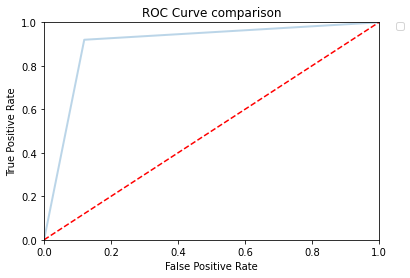

In [35]:
plot_roc_curve(model2, train_X, train_y, test_X)

No handles with labels found to put in legend.


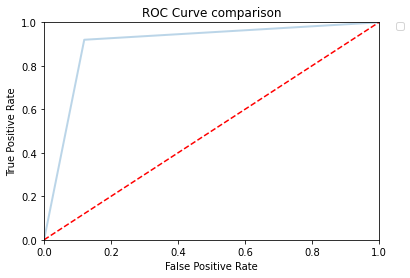

In [36]:
plot_roc_curve(model, train_X, train_y, test_X)

In [37]:
roc_auc_score(test_y, predictions)


0.9

In [38]:
def confusion_matrix(clf, train_X, train_y, test_y,test_X):
		clf = clf.fit(train_X, train_y)
		predictions = clf.predict(test_X)

		from sklearn.metrics import classification_report
		print(classification_report(test_y, predictions))

In [39]:
confusion_matrix(model2, train_X, train_y, test_y,test_X)

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        75
           1       0.72      0.92      0.81        25

    accuracy                           0.89       100
   macro avg       0.84      0.90      0.87       100
weighted avg       0.91      0.89      0.89       100



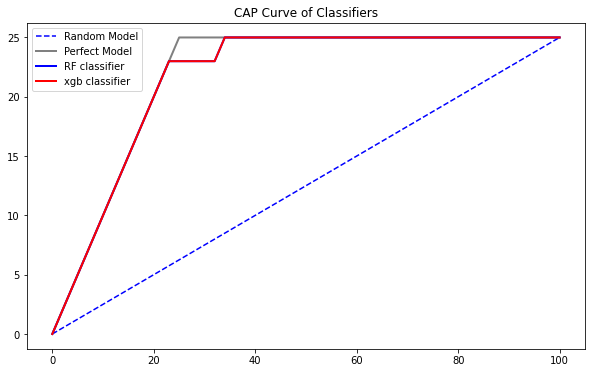

In [40]:
#Visualize the CAP Curve Analysis including all classification models
y_pred_xgb= predictions
y_pred_rf= predictions2
total = len(test_y) 
one_count = np.sum(test_y) 
zero_count = total - one_count 
lm_rf = [y for _, y in sorted(zip(y_pred_rf, test_y), reverse = True)]
lm_xgb = [y for _, y in sorted(zip(y_pred_xgb, test_y), reverse = True)] 

x = np.arange(0, total + 1) 
y_rf = np.append([0], np.cumsum(lm_rf)) 
y_xgb = np.append([0], np.cumsum(lm_xgb)) 
 
plt.figure(figsize = (10, 6)) 
plt.plot([0, total], [0, one_count], c = 'b', linestyle = '--', label = 'Random Model')
plt.plot([0, one_count, total], [0, one_count, one_count], c = 'grey', linewidth = 2, label = 'Perfect Model')
plt.title('CAP Curve of Classifiers')
plt.plot(x, y_rf, c = 'b', label = 'RF classifier', linewidth = 2)
plt.plot(x, y_xgb, c = 'r', label = 'xgb classifier', linewidth = 2)

plt.legend()


In [41]:
#AR


In [42]:
y_preds_proba = model2.predict_proba(test_X)
y_values=test_y



def capcurve(y_values, y_preds_proba):
    num_pos_obs = np.sum(y_values)
    num_count = len(y_values)
    rate_pos_obs = float(num_pos_obs) / float(num_count)
    ideal = pd.DataFrame({'x':[0,rate_pos_obs,1],'y':[0,1,1]})
    xx = np.arange(num_count) / float(num_count - 1)
    
    y_cap = np.c_[y_values,y_preds_proba]
    y_cap_df_s = pd.DataFrame(data=y_cap)
    y_cap_df_s = y_cap_df_s.sort_values([1], ascending=False).reset_index(level = y_cap_df_s.index.names, drop=True)
    
    # print(y_cap_df_s.head(20))
    
    yy = np.cumsum(y_cap_df_s[0]) / float(num_pos_obs)
    yy = np.append([0], yy[0:num_count-1]) #add the first curve point (0,0) : for xx=0 we have yy=0
    
    percent = 0.5
    row_index = int(np.trunc(num_count * percent))
    
    val_y1 = yy[row_index]
    val_y2 = yy[row_index+1]
    if val_y1 == val_y2:
        val = val_y1*1.0
    else:
        val_x1 = xx[row_index]
        val_x2 = xx[row_index+1]
        val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)
    
    sigma_ideal = 1 * xx[num_pos_obs - 1 ] / 2 + (xx[num_count - 1] - xx[num_pos_obs]) * 1
    sigma_model = integrate.simps(yy,xx)
    sigma_random = integrate.simps(xx,xx)
    
    ar_value = (sigma_model - sigma_random) / (sigma_ideal - sigma_random)
    if ar_value>1:
      ar_value=1

    
    
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    ax.plot(ideal['x'],ideal['y'], color='grey', label='Perfect Model')
    ax.plot(xx,yy, color='red', label='User Model')
    ax.plot(xx,xx, color='blue', label='Random Model')
    ax.plot([percent, percent], [0.0, val], color='green', linestyle='--', linewidth=1)
    ax.plot([0, percent], [val, val], color='green', linestyle='--', linewidth=1, label=str(val*100)+'% of positive obs at '+str(percent*100)+'%')
    
    plt.xlim(0, 1.02)
    plt.ylim(0, 1.25)
    plt.title("CAP Curve - a_r value ="+str(ar_value))
    plt.xlabel('% of the data')
    plt.ylabel('% of positive obs')
    plt.legend()
    return ar_value



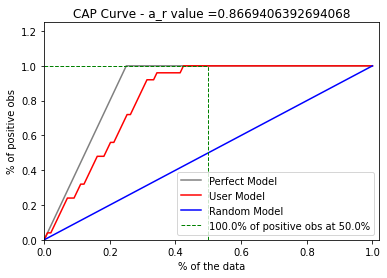

In [43]:
ar_value=capcurve(y_values=test_y, y_preds_proba=y_preds_proba[:,1])

In [44]:
print("ar value=",ar_value )

ar value= 0.8669406392694068


In [45]:
#Compute the Kolmogorov-Smirnov statistic on 2 samples
#https://sparky.rice.edu//astr360/kstest.pdf

In [46]:
from scipy import stats

In [47]:
alpha=0.05

In [48]:
# This tests whether 2 samples are drawn from the same distribution.
statistics, pvalue = stats.ks_2samp(predictions, test_y)
print(statistics, pvalue)

0.07 0.9684099261397212


In [49]:
if pvalue>alpha:
  print("H0 - the same distribution")
else:
  print("H1 the different one")

H0 - the same distribution


In [50]:
statistics2, pvalue2 =  stats.ks_2samp(predictions2, test_y)

In [51]:
if pvalue2>alpha:
  print("H0 - the same distribution")
else:
  print("H1 the different one")

H0 - the same distribution
